In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("credit card.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [7]:
import matplotlib.pyplot as plt
type_counts = data['type'].value_counts()
tarnsactions = type_counts.index
quantity = type_counts.values

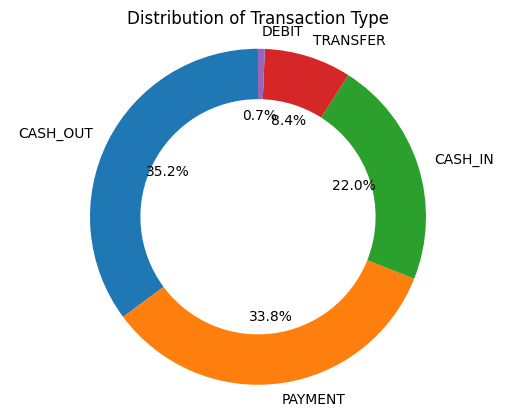

In [10]:
fig, ax = plt.subplots()
ax.pie(quantity, labels = transactions, autopct = '%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.axis('equal')
plt.title('Distribution of Transaction Type')
plt.show()

Now let’s have a look at the correlation between the features of the data with the isFraud column:

In [11]:
correlation = data.corr()
print(correlation['isFraud'].sort_values(ascending=False))

C:\Users\Pavan\AppData\Local\Temp\ipykernel_25692\2758495956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


Now let’s transform the categorical features into numerical. Here I will also transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [12]:
data['type'] = data['type'].map({'CASH_OUT': 1, 'PAYMENT': 2,
                                 'CASH_IN': 3, 'TRANSFER': 4,
                                 'DEBIT': 5})
data['isFraud'] = data['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


Now let’s train a classification model to classify fraud and non-fraud transactions. Before training the model, I will split the data into training and test sets:

In [13]:
from sklearn.model_selection import train_test_split
x = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(data[['isFraud']])

In [14]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9997013808776888


Now let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:

In [15]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,Fraud,0
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,Fraud,0


In [16]:
features = np.array([[1, 339682.13, 339682.13, 0.0]])

In [17]:
print(model.predict(features))

['Fraud']
